In [71]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = 80

In [72]:
df=pd.read_csv('train.csv')
df.drop(columns=['Id'],axis=1,inplace=True)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [73]:
df.shape

(1460, 80)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [75]:
total=df.isnull().sum().sort_values(ascending=False)

percent=((df.isnull().sum()*100)/(df.isnull().count())).sort_values(ascending=False)

missing_data=pd.concat([total,percent],axis=1,keys=['Total', 'Percentage of Missing Values'])
missing_data[missing_data['Percentage of Missing Values']>0]

,Total,Percentage of Missing Values
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
GarageCond,81,5.547945
GarageType,81,5.547945
GarageFinish,81,5.547945


### Create generalized functions to calculate various metrics for models:

#### Create a generalized function to calculate the RMSE for train and test set.

In [76]:
# create a generalized function to calculate the RMSE values for train set
def get_train_rmse(model):
    
    # For training set:
    # train_pred: prediction made by the model on the training dataset 'X_train'
    # y_train: actual values ofthe target variable for the train dataset

    # predict the output of the target variable from the train data 
    train_pred = model.predict(X_train)

    # calculate the MSE using the "mean_squared_error" function

    # MSE for the train data
    mse_train = mean_squared_error(y_train, train_pred)

    # take the square root of the MSE to calculate the RMSE
    # round the value upto 4 digits using 'round()'
    rmse_train = round(np.sqrt(mse_train), 4)
    
    # return the training RMSE
    return(rmse_train)

In [77]:
# create a generalized function to calculate the RMSE values test set
def get_test_rmse(model):
    
    # For testing set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data
    test_pred = model.predict(X_test)

    # MSE for the test data
    mse_test = mean_squared_error(y_test, test_pred)

    # take the square root of the MSE to calculate the RMSE
    # round the value upto 4 digits using 'round()'
    rmse_test = round(np.sqrt(mse_test), 4)

    # return the test RMSE
    return(rmse_test)

#### Create a generalized function to calculate the MAPE for test set.

In [78]:
# define a function to calculate MAPE
# pass the actual and predicted values as input to the function
# return the calculated MAPE 
def mape(actual, predicted):
    return (np.mean(np.abs((actual - predicted) / actual)) * 100)

def get_train_mape(model):
    
    # For testing set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data
    test_pred = model.predict(X_train)
    
    # calculate the mape using the "mape()" function created above
    # calculate the MAPE for the test data
    mape_test = mape(y_train, test_pred)

    # return the MAPE for the test set
    return(mape_train)

#### Create a generalized function to calculate the R-Squared and Adjusted R- Squared

In [79]:
# define a function to get R-squared and adjusted R-squared value
def get_score(model):
    
    # score() returns the R-squared value
    r_sq = model.score(X_train, y_train)
    
    # calculate adjusted R-squared value
    # 'n' denotes number of observations in train set
    # 'shape[0]' returns number of rows 
    n = X_train.shape[0]
    
    # 'k' denotes number of variables in train set
    # 'shape[1]' returns number of columns
    k = X_train.shape[1]
    
    # calculate adjusted R-squared using the formula
    r_sq_adj = 1 - ((1-r_sq)*(n-1)/(n-k-1))
    
    # return the R-squared and adjusted R-squared value 
    return ([r_sq, r_sq_adj])

#### Create a generalized function to create a dataframe containing the scores from all the models

In [80]:
# create an empty dataframe to store the scores for various algorithms
score_card = pd.DataFrame(columns=['Model_Name', 'Alpha (Wherever Required)', 'l1-ratio', 'R-Squared',
                                       'Adj. R-Squared', 'Test_RMSE', 'Test_MAPE'])

# create a function to update the score card for comparision of the scores from different algorithms
# pass the model name, model build, alpha and l1_ration as input parameters
# if 'alpha' and/or 'l1_ratio' is not specified, the function assigns '-'
def update_score_card(algorithm_name, model, alpha = '-', l1_ratio = '-'):
    
    # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({'Model_Name': algorithm_name,
                       'Alpha (Wherever Required)': alpha, 
                       'l1-ratio': l1_ratio, 
                       'Test_MAPE': get_train_mape(model), 
                       'Test_RMSE': get_train_rmse(model), 
                       'R-Squared': get_score(model)[0], 
                       'Adj. R-Squared': get_score(model)[1]}, ignore_index = True)

In [81]:
# Dropping Columns which have null values percentage greater than 60%
df_copy=df.copy()

df_copy=df_copy.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence'])

df_num=df_copy.select_dtypes(np.number)

df_cat=df_copy.select_dtypes('O')

In [82]:
df_num=df_num.apply(lambda x: x.fillna(x.median()),axis=0)

df_cat=df_cat.apply(lambda x:x.fillna(x.mode()),axis=0)

df_copy=pd.concat([df_cat,df_num],axis=1)

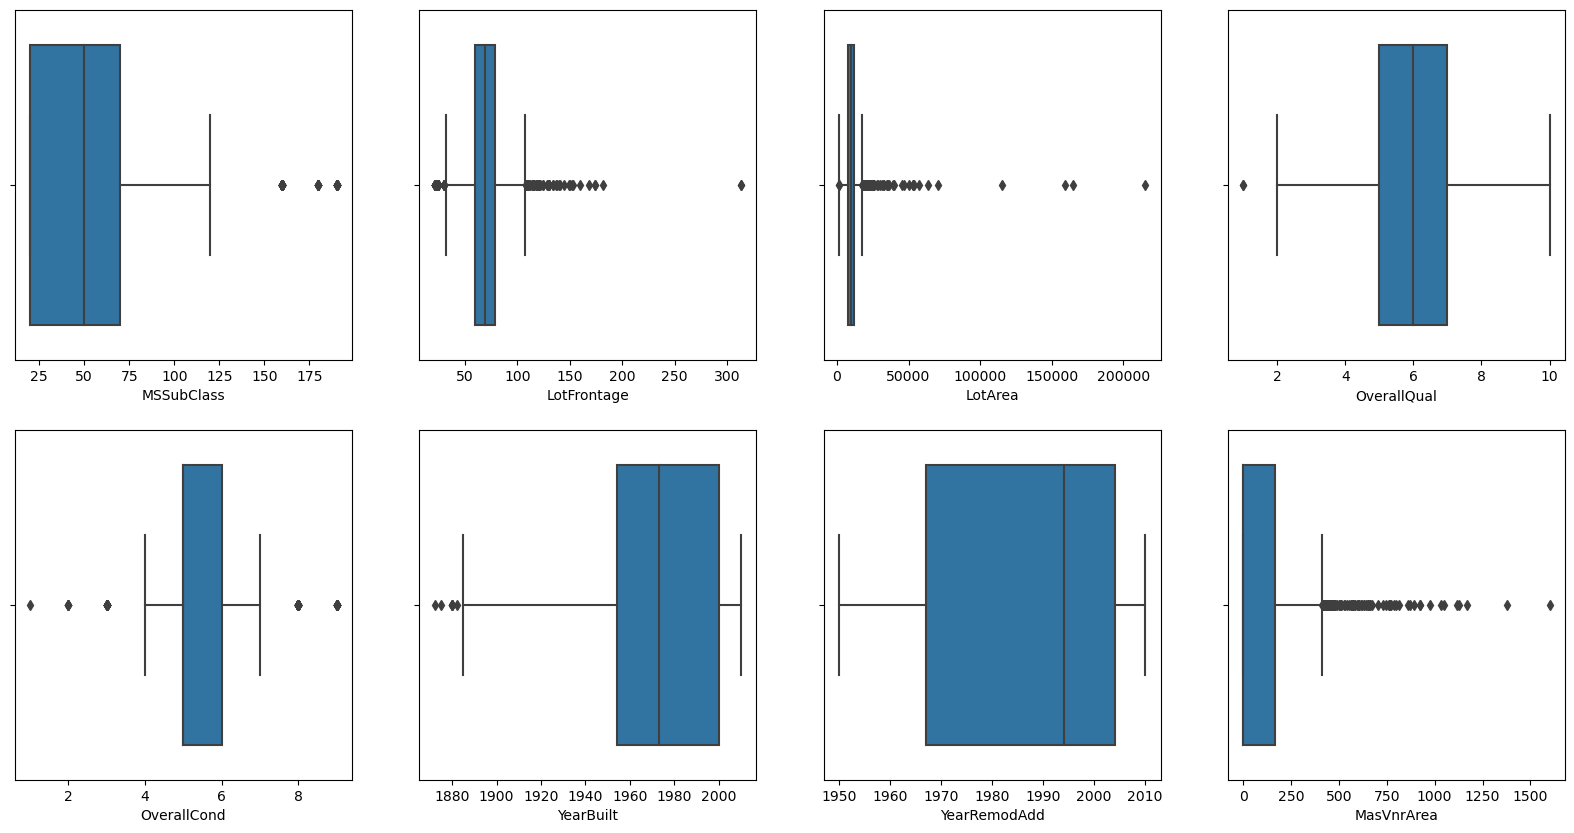

In [83]:
fig,ax=plt.subplots(nrows=2,ncols=4,figsize=(20,10))

for variable,subplot in zip(df_num.iloc[:,:8].columns,ax.flatten()):
    sns.boxplot(df_num[variable],ax=subplot)
    
plt.show()

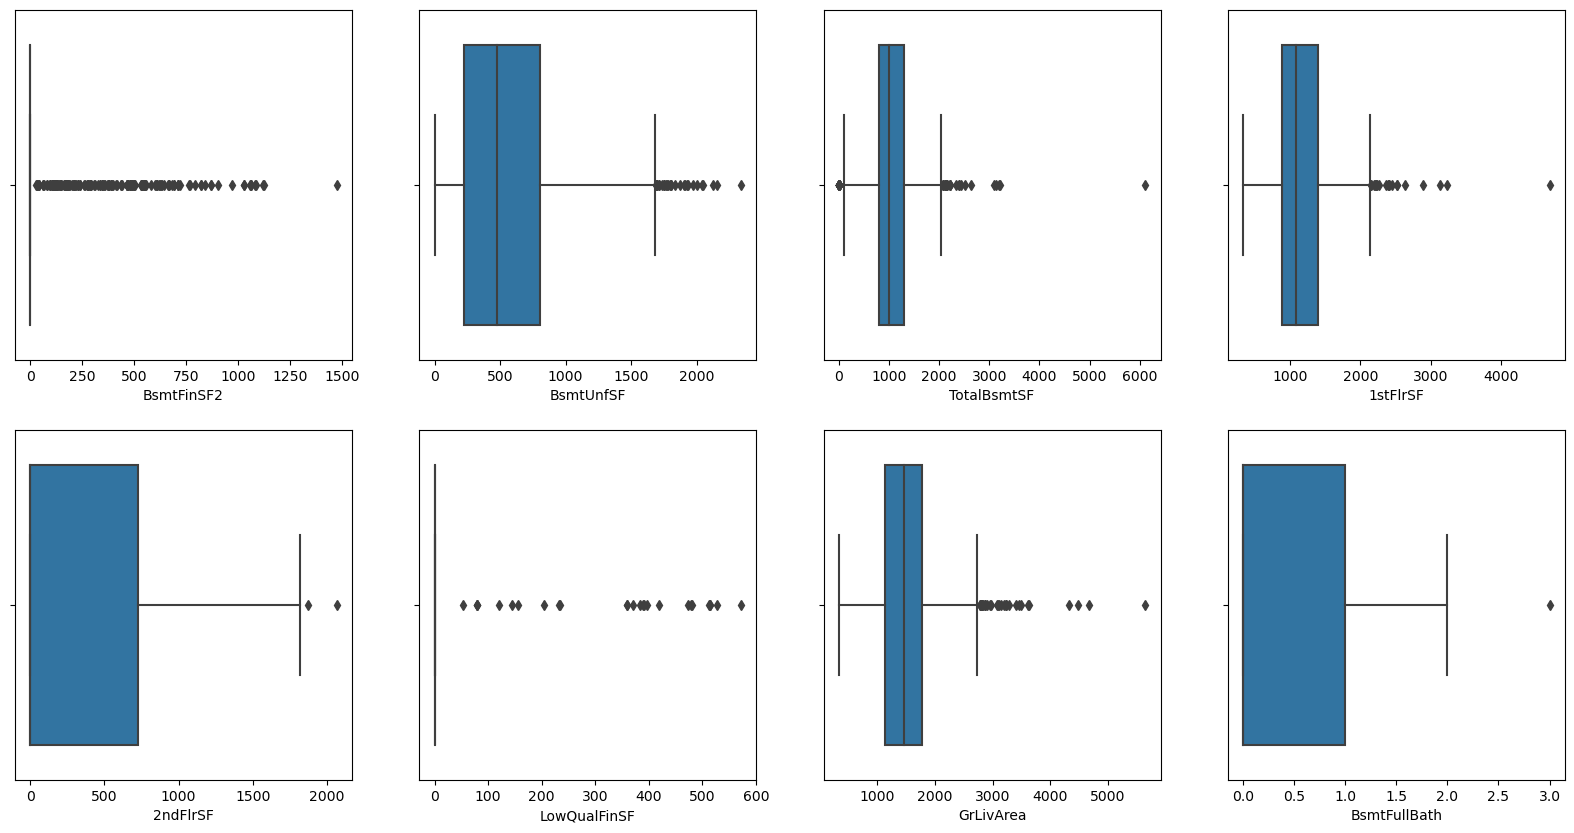

In [84]:
fig,ax=plt.subplots(nrows=2,ncols=4,figsize=(20,10))

for variable,subplot in zip(df_num.iloc[:,9:17].columns,ax.flatten()):
    sns.boxplot(df_num[variable],ax=subplot)
    
plt.show()

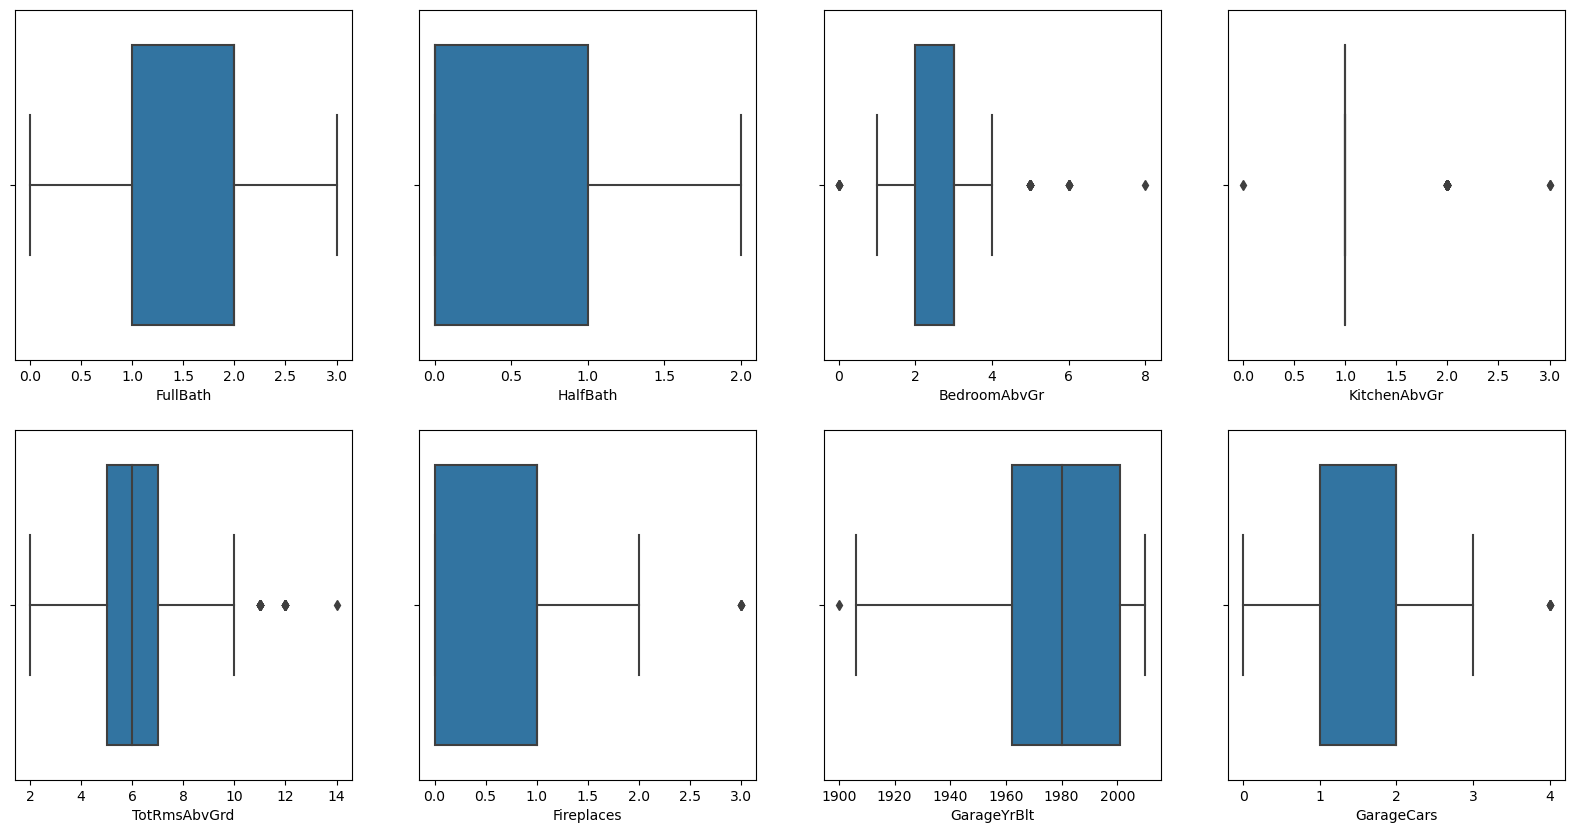

In [85]:
fig,ax=plt.subplots(nrows=2,ncols=4,figsize=(20,10))

for variable,subplot in zip(df_num.iloc[:,18:26].columns,ax.flatten()):
    sns.boxplot(df_num[variable],ax=subplot)
    
plt.show()

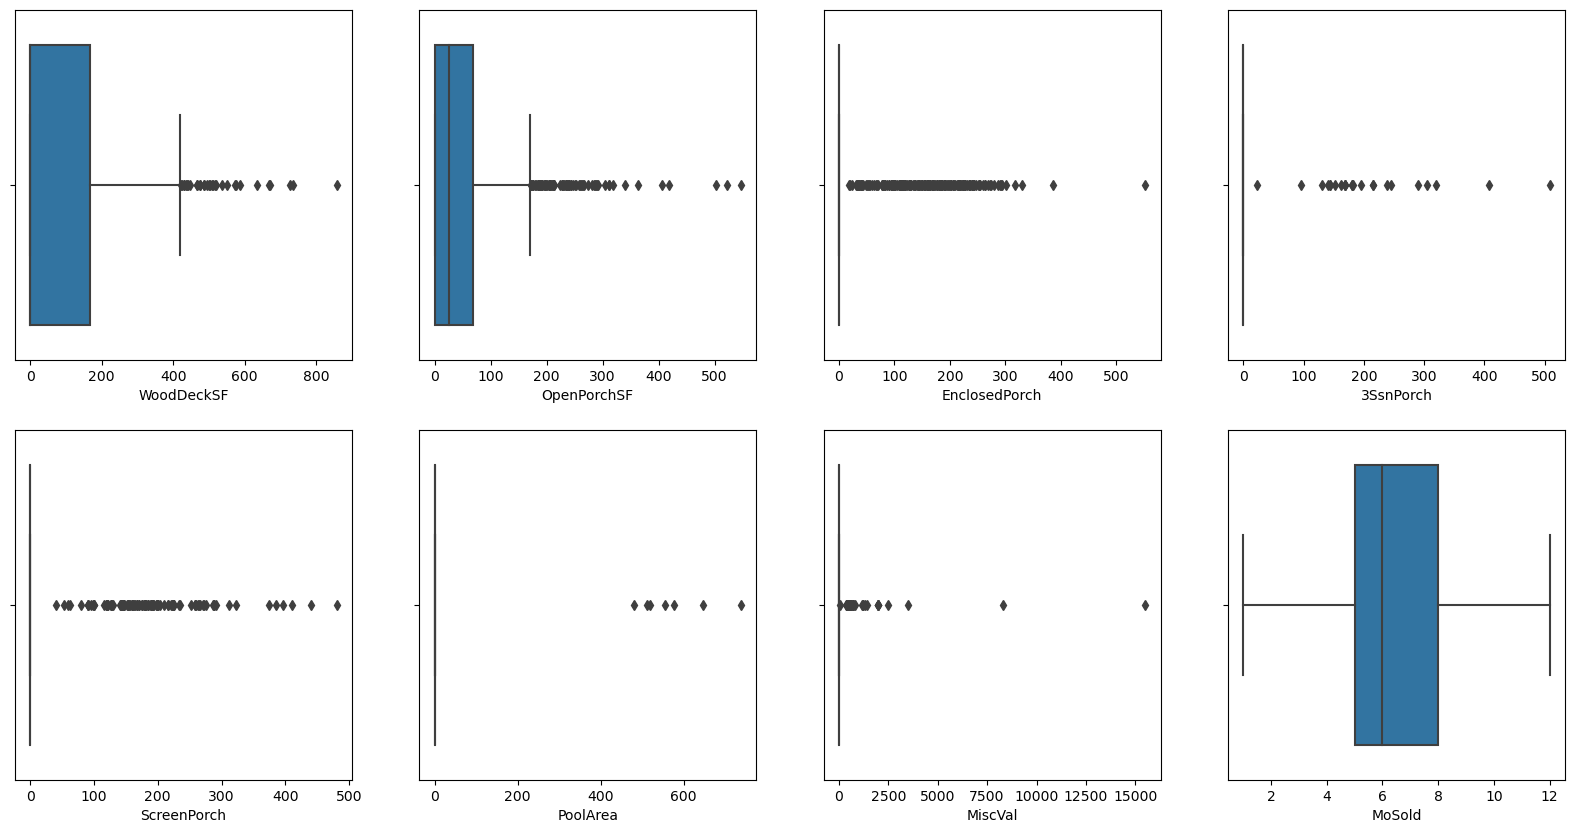

In [86]:
fig,ax=plt.subplots(nrows=2,ncols=4,figsize=(20,10))

for variable,subplot in zip(df_num.iloc[:,27:35].columns,ax.flatten()):
    sns.boxplot(df_num[variable],ax=subplot)
    
plt.show()

In [87]:
# calculate the first quartile
Q1 = df_copy.quantile(0.25)

# calculate the third quartile
Q3 = df_copy.quantile(0.75)

# The Interquartile Range (IQR) is defined as the difference between the third and first quartile
# calculate IQR for each numeric variable
IQR = Q3 - Q1

# retrieve the dataframe without the outliers
# '~' returns the values that do not satisfy the given conditions 
# i.e. it returns values between the range [Q1-1.5*IQR, Q3+1.5*IQR]
# '|' is used as 'OR' operator on multiple conditions   
# 'any(axis=1)' checks the entire row for atleast one 'True' entry (those rows represents outliers in the data)
df_iqr = df_copy[~((df_copy < (Q1 - 1.5 * IQR)) | (df_copy > (Q3 + 1.5 * IQR))).any(axis=1)]

# check the shape of the data
df_iqr.shape

(557, 76)

In [88]:
df_num=df_iqr.select_dtypes(np.number)

df_cat=df_iqr.select_dtypes('O')
df_cat.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
6,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,Stone,Gd,TA,PConc,Ex,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
10,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,Hip,CompShg,HdBoard,HdBoard,None,TA,TA,CBlock,TA,TA,No,Rec,Unf,GasA,Ex,Y,SBrkr,TA,Typ,NaN,Detchd,Unf,TA,TA,Y,WD,Normal


In [89]:
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import LabelEncoder

In [90]:
scaler=StandardScaler()

df_num_scaled=pd.DataFrame(scaler.fit_transform(df_num),columns=df_num.columns)

df_num_scaled.dropna(inplace=True)

df_num_scaled.shape

(557, 37)

In [91]:
# Encoding the variable
df_cat_label = df_cat.apply(LabelEncoder().fit_transform)

df_cat_label.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,2,1,3,3,0,4,0,3,2,0,0,3,0,0,7,9,1,2,2,2,2,2,3,2,0,0,0,1,2,2,4,2,0,1,2,3,2,8,3
2,2,1,0,3,0,4,0,3,2,0,0,3,0,0,7,9,1,2,2,2,2,2,2,2,0,0,0,1,2,2,4,4,0,1,2,3,2,8,3
4,2,1,0,3,0,2,0,13,2,0,0,3,0,0,7,9,1,2,2,2,2,2,0,2,0,0,0,1,2,2,4,4,0,1,2,3,2,8,3
6,2,1,3,3,0,4,0,19,2,0,0,2,0,0,7,9,3,2,2,2,0,2,0,2,0,0,0,1,2,2,4,2,0,1,2,3,2,8,3
10,2,1,3,3,0,4,0,17,2,0,0,2,2,0,3,3,2,3,2,1,3,2,3,4,0,0,0,1,2,3,4,5,3,2,2,3,2,8,3


In [92]:
df_final=pd.concat([df_cat_label,df_num_scaled],axis=1)

df_final=df_final.apply(lambda x: x.fillna(x.median()),axis=0)

y_train=df_final['SalePrice'].copy()

x=df_final.drop(columns=['SalePrice'],axis=1)

df_final.shape

(911, 76)

In [93]:
## Temporal Variables (Date Time Variables)

for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
       
    df_final[feature]=df_final['YrSold']-df_final[feature]

In [94]:
#sns.heatmap(df_num_scaled,annot=True)

#plt.show()

In [95]:
# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import 'stats'
from scipy import stats

In [96]:
# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train=sm.add_constant(x)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

X_train (911, 76)
y_train (911,)


In [97]:
base_model=sm.OLS(y_train,X_train).fit()

print(base_model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     121.8
Date:                Thu, 21 Oct 2021   Prob (F-statistic):               0.00
Time:                        17:25:50   Log-Likelihood:                -31.799
No. Observations:                 911   AIC:                             187.6
Df Residuals:                     849   BIC:                             486.1
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0033      0.401     -0.008

### Model Evaluation:

#### R-Squared:

In [98]:
# calculate R-Squared on train dataset
# use 'rsquared' from statsmodel
r_sq_mlr = base_model.rsquared

# print the value
print("R-Squared for base model:",r_sq_mlr)

R-Squared for base model: 0.8974270120632585


#### Adjusted R-Squared:

In [99]:
# calculate adjusted R-Squared on train dataset
# use 'rsquared_adj' from statsmodel
adj_r_sq = base_model.rsquared_adj

# print the value
print("adjusted R-Squared for base model:",adj_r_sq)

adjusted R-Squared for base model: 0.8900572214105598


### Model Performance:

In [100]:
# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [101]:
# For training set:
# train_pred: prediction made by the model on the training dataset 'X_train_signi_var'
# y_train_signi_var: actual values of the target variable for the train dataset

# For testing set:
# test_pred: prediction made by the model on the test dataset 'X_test_signi_var'
# y_test_signi_var: actual values of the target variable for the test dataset

# predict the output of the target variable from the train data 
# train_pred can also be obtained from "MLR_model_with_significant_var.fittedvalues"
train_pred = base_model.predict(X_train)

#### Mean Squared Error (MSE)

In [102]:
# calculate the MSE using the "mean_squared_error" function

# calculate the MSE for the train data
# round the value upto 4 digits using 'round()'
mse_train = round(mean_squared_error(y_train, train_pred),4)

# print the MSE for the training set
print("Mean Squared Error (MSE) on training set: ", mse_train)

Mean Squared Error (MSE) on training set:  0.0628


####  Root Mean Squared Error (RMSE):

In [103]:
# calculate the MSE using the "mean_squared_error" function

# MSE for the train data
mse_train = mean_squared_error(y_train, train_pred)

# take the square root of the MSE to calculate the RMSE
# round the value upto 4 digits using 'round()'
rmse_train = round(np.sqrt(mse_train), 4)

# print the RMSE for the train set
print("Root Mean Squared Error (RMSE) on training set: ", rmse_train)

Root Mean Squared Error (RMSE) on training set:  0.2506


#### Mean Absolute Error (MAE):

In [104]:
# calculate the MAE using the "mean_absolute_error" function

# calculate the MAE for the train data
# round the value upto 4 digits using 'round()'
mae_train = round(mean_absolute_error(y_train, train_pred),4)

# print the MAE for the training set
print("Mean Absolute Error (MAE) on training set: ", mae_train)

Mean Absolute Error (MAE) on training set:  0.1572


#### Mean Absolute Percentage Error (MAPE):

In [105]:
# define a function to calculate MAPE
# pass the actual and predicted values as input to the function
# return the calculated MAPE 
def mape(actual, predicted):
    return (np.mean(np.abs((actual - predicted) / actual)) * 100)

In [106]:
# calculate the mape using the "mape()" function created above

# calculate the MAPE for the train data
# round the value upto 4 digits using 'round()'
mape_train = round(mape(y_train, train_pred),4)

# print the MAPE for the training set
print("Mean Absolute Percentage Error (MAPE) on training set: ", mape_train)

Mean Absolute Percentage Error (MAPE) on training set:  140.2516


**Variance Inflation Factor (VIF)**

In [107]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [108]:
# create an empty dataframe to store the VIF for each variable
vif = pd.DataFrame()

# create a column of variable names
vif["Features"] = df_final.select_dtypes(np.number).columns

# calculate VIF using list comprehension 
# use for loop to access each variable 
# calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
vif["VIF_Factor"] = [variance_inflation_factor(df_final.select_dtypes(np.number).values, i) for i in range(df_final.select_dtypes(np.number).shape[1])]

# sort the dataframe based on the values of VIF_Factor in descending order
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
vif_sort=vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

(vif_sort[vif_sort['VIF_Factor']>7])

,Features,VIF_Factor
0,GrLivArea,inf
1,2ndFlrSF,inf
2,1stFlrSF,inf
3,TotalBsmtSF,inf
4,BsmtUnfSF,inf
5,BsmtFinSF1,inf
6,Street,512.186055
7,Functional,259.056440
8,GarageCond,183.027602
9,Exterior1st,104.335886


#df_final_sign=df_final.drop(columns=['GrLivArea','2ndFlrSF','1stFlrSF','TotalBsmtSF','BsmtUnfSF','BsmtFinSF1','Street','Functional',
                                     'GarageCond','Exterior1st','GarageQual','CentralAir','Exterior2nd','ExterCond','PavedDrive',
                                     'ExterQual','BsmtCond','SaleType','Foundation','LandContour','Electrical','KitchenQual','BsmtQual',
                                     'MSZoning','SaleCondition','Condition1','FireplaceQu','MasVnrType','HouseStyle',
                                     'LotConfig','BsmtExposure','GarageFinish','EnclosedPorch','3SsnPorch',
                                    'ScreenPorch','PoolArea','MiscVal'],axis=1)

x=df_final_sign.drop(columns=['SalePrice'],axis=1)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train=sm.add_constant(x)



# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

#### Biuld a MLR Model :

In [109]:
mlr_model=sm.OLS(y_train,X_train).fit()

print(mlr_model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     121.8
Date:                Thu, 21 Oct 2021   Prob (F-statistic):               0.00
Time:                        17:25:53   Log-Likelihood:                -31.799
No. Observations:                 911   AIC:                             187.6
Df Residuals:                     849   BIC:                             486.1
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0033      0.401     -0.008

In [110]:
# import functions to perform feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

# import function to perform linear regression
from sklearn.linear_model import LinearRegression

In [111]:
# initiate linear regression model to use in feature selection
linreg_rfe = LinearRegression()

# build the RFE model
# pass the regression model to 'estimator'
# pass number of required features to 'n_features_to_select'
# if we do not pass the number of features, RFE considers half of the features
rfe_model = RFE(estimator=linreg_rfe, n_features_to_select = 12)

# fit the RFE model on the training dataset using fit()
rfe_model = rfe_model.fit(X_train, y_train)

# create a series containing feature and its corresponding rank obtained from RFE
# 'ranking_' returns the rank of each variable after applying RFE
# pass the ranks as the 'data' of a series
# 'index' assigns feature names as index of a series 
feat_index = pd.Series(data = rfe_model.ranking_, index = X_train.columns)

# select the features with rank = 1
# 'index' returns the indices of a series (i.e. features with rank=1) 
signi_feat_rfe = feat_index[feat_index==1].index

# print the significant features obtained from RFE
print(signi_feat_rfe)

Index(['LandSlope', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'BedroomAbvGr',
       'GarageYrBlt', 'GarageArea'],
      dtype='object')


In [112]:
# initiate linear regression model to use in feature selection
linreg = LinearRegression()

# build step forward selection
# pass the regression model to 'estimator'
# pass number of required feartures to 'k_features'. 'best' means that a best possible subset will be selected  
# 'forward=True' performs forward selection method
# 'verbose=1' returns the number of features at the corresponding step
# 'verbose=2' returns the R-squared scores and the number of features at the corresponding step
# 'scoring=r2' considers R-squared score to select the feature
linreg_forward = sfs(estimator = linreg, k_features = 'best', forward = True,
                     verbose = 2, scoring = 'r2')

# fit the step forward selection on training data using fit()
sfs_forward = linreg_forward.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  76 out of  76 | elapsed:    1.7s finished

[2021-10-21 17:25:55] Features: 1/76 -- score: -1.9339331050193917e+28[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    1.8s finished

[2021-10-21 17:25:57] Features: 2/76 -- score: -7.858861272141805e+27[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  74 out of  74 | elapsed:    1.9s finished

[2021-10-21 17:25:59] Features: 3/76 -- score: -6.531085647014921e+26[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_job

[Parallel(n_jobs=1)]: Done  49 out of  49 | elapsed:    0.7s finished

[2021-10-21 17:26:28] Features: 28/76 -- score: -1.606710951661845e+29[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    1.2s finished

[2021-10-21 17:26:29] Features: 29/76 -- score: -1.6348140089025487e+29[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  47 out of  47 | elapsed:    0.8s finished

[2021-10-21 17:26:30] Features: 30/76 -- score: -1.756169460315801e+29[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  46 out of  46 | elapsed:    1.0s finished

[2021-10-21 17:26:31] 

[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.5s finished

[2021-10-21 17:26:50] Features: 56/76 -- score: -1.0815638044931108e+30[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.6s finished

[2021-10-21 17:26:51] Features: 57/76 -- score: -1.1094146409258537e+30[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.4s finished

[2021-10-21 17:26:51] Features: 58/76 -- score: -1.0945397614110746e+30[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.3s finished

[2021-10-21 17:26:52

In [113]:
# printing the selected feature names when k_features = 'best'
print('Features selelected using forward selection are: ')
print(sfs_forward.k_feature_names_)

# print the R-squared value
print('\nR-Squared: ', sfs_forward.k_score_)

Features selelected using forward selection are: 
('Condition2', 'Heating', 'LotArea', 'BsmtUnfSF', 'YrSold')

R-Squared:  -6.523110909436891e+26


###  Multiple Linear Regression (OLS)

#### Build a MLR model on a training dataset.

In [114]:
# initiate linear regression model
linreg = LinearRegression()

# build the model using X_train and y_train
# use fit() to fit the regression model
MLR_model = linreg.fit(X_train, y_train)

# print the R-squared value for the model
# score() returns the R-squared value
MLR_model.score(X_train, y_train)

0.7881068246862083

In [115]:
# print training RMSE`
print('RMSE on train set: ', get_train_rmse(MLR_model))

RMSE on train set:  0.3601


In [116]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'Linear Regression', model = MLR_model)

# print the dataframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.788107,0.768798,0.3601,140.2516


### Stochastic Gradient Descent

In [117]:
# import SGDRegressor from sklearn to perform linear regression with stochastic gradient descent
from sklearn.linear_model import SGDRegressor

#### Build MLR model using SGD method.

In [118]:
# instantiate the SGDRegressor
# set 'random_state' to generate the same dataset each time you run the code 
sgd = SGDRegressor(random_state = 10)

# build the model on train data 
# use fit() to fit the model
linreg_with_SGD = sgd.fit(X_train, y_train)

# print RMSE for train set
# call the function 'get_train_rmse'
print('RMSE on train set:', get_train_rmse(linreg_with_SGD))

RMSE on train set: 0.2657


In [119]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'Linear Regression (using SGD)', model = linreg_with_SGD)

# print the dataframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.788107,0.768798,0.3601,140.2516
1,Linear Regression (using SGD),-,-,0.884631,0.874117,0.2657,140.2516


### Regularization

####  Ridge Regression

In [120]:
# import function for ridge regression
from sklearn.linear_model import Ridge

# import function for lasso regression
from sklearn.linear_model import Lasso

# import function for elastic net regression
from sklearn.linear_model import ElasticNet

# import function to perform GridSearchCV
from sklearn.model_selection import GridSearchCV

#### Build regression model using Ridge Regression for alpha = 1.

In [121]:
# use Ridge() to perform ridge regression
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run 
ridge = Ridge(alpha = 100, max_iter = 500)

# fit the model on train set
model=ridge.fit(X_train, y_train)

# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on train set:', get_train_rmse(model))

RMSE on train set: 0.2625


In [122]:
# update the dataframe 'score_card'
update_score_card(algorithm_name='Ridge Regression (with alpha = 1)', model = ridge, alpha = 1)

# print the dataframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.788107,0.768798,0.3601,140.2516
1,Linear Regression (using SGD),-,-,0.884631,0.874117,0.2657,140.2516
2,Ridge Regression (with alpha = 1),1,-,0.887457,0.877202,0.2625,140.2516


### Lasso Regression

In [123]:
# use Lasso() to perform lasso regression
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run
lasso = Lasso(alpha = 0.01, max_iter = 500)

# fit the model on train set
lasso.fit(X_train, y_train)

# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on train set:', get_train_rmse(lasso))

RMSE on train set: 0.2603


In [124]:
# create a dataframe to store the variable names and their corresponding coefficient values.
df_lasso_coeff = pd.DataFrame({'Variable': X_train.columns, 'Coefficient': lasso.coef_})

# print the variables having the coefficient value equal to zero
# 'to_list()' converts the output to the list type
print('Insignificant variables obtained from Lasso Regression when alpha is 0.01')
df_lasso_coeff.Variable[df_lasso_coeff.Coefficient == 0].to_list()

Insignificant variables obtained from Lasso Regression when alpha is 0.01


['const',
 'MSZoning',
 'Street',
 'LandContour',
 'Utilities',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition',
 'MSSubClass',
 'MasVnrArea',
 'BsmtFinSF2',
 'BsmtUnfSF',
 '1stFlrSF',
 'LowQualFinSF',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'WoodDeckSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [125]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'Lasso Regression', model = lasso, alpha = '0.01')

# print the datarframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.788107,0.768798,0.3601,140.2516
1,Linear Regression (using SGD),-,-,0.884631,0.874117,0.2657,140.2516
2,Ridge Regression (with alpha = 1),1,-,0.887457,0.877202,0.2625,140.2516
3,Lasso Regression,0.01,-,0.889287,0.879198,0.2603,140.2516


### Elastic Net Regression

In [126]:
# use ElasticNet() to perform Elastic Net regression
# 'alpha' assigns the regularization strength to the model
# 'l1_ratio' is the ElasticNet mixing parameter
# 'l1_ratio = 0' performs Ridge regression
# 'l1_ratio = 1' performs Lasso regression
# pass number of iterations to 'max_iter'
enet = ElasticNet(alpha = 0.1, l1_ratio = 0.01, max_iter = 500)

# fit the model on train data
enet.fit(X_train, y_train)


# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on train set:', get_train_rmse(enet))

RMSE on train set: 0.2619


In [127]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'Elastic Net Regression', model = enet, alpha = '0.1', l1_ratio = '0.01')

# print the datarframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.788107,0.768798,0.3601,140.2516
1,Linear Regression (using SGD),-,-,0.884631,0.874117,0.2657,140.2516
2,Ridge Regression (with alpha = 1),1,-,0.887457,0.877202,0.2625,140.2516
3,Lasso Regression,0.01,-,0.889287,0.879198,0.2603,140.2516
4,Elastic Net Regression,0.1,0.01,0.887901,0.877686,0.2619,140.2516


### GridSearchCV

#### Find optimal value of alpha for `Ridge Regression`

In [128]:
# create a dictionary with hyperparameters and its values
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run
tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 1e-4,1e-3, 1e-2, 0.1, 1, 5, 10,16, 40, 60, 80, 100]}]
 
# initiate the ridge regression model
ridge = Ridge()

# use GridSearchCV() to find the optimal value of alpha
# estimator: pass the ridge regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
ridge_grid = GridSearchCV(estimator = ridge, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train and y_train using fit()
ridge_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for Ridge Regression: ', ridge_grid.best_params_, '\n')

# print the RMSE for test set using the model having optimal value of alpha
print('RMSE on train set:', get_train_rmse(ridge_grid))

Best parameters for Ridge Regression:  {'alpha': 100} 

RMSE on train set: 0.2625


In [129]:
# update the dataframe 'score_card'
# 'best_params_' returns the dictionary containig best parameter values and parameter name  
# 'get()' returns the value of specified parameter
update_score_card(algorithm_name = 'Ridge Regression (using GridSearchCV)', 
                  model = ridge_grid, 
                  alpha = ridge_grid.best_params_.get('alpha'))

# print the datarframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.788107,0.768798,0.3601,140.2516
1,Linear Regression (using SGD),-,-,0.884631,0.874117,0.2657,140.2516
2,Ridge Regression (with alpha = 1),1,-,0.887457,0.877202,0.2625,140.2516
3,Lasso Regression,0.01,-,0.889287,0.879198,0.2603,140.2516
4,Elastic Net Regression,0.1,0.01,0.887901,0.877686,0.2619,140.2516
5,Ridge Regression (using GridSearchCV),100,-,0.887457,0.877202,0.2625,140.2516


####  Find optimal value of alpha for `Lasso Regression`

In [130]:
# create a dictionary with hyperparameters and its values
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run
tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20]}]
                     
# 'max_iter':100,500,1000,1500,2000
 
# initiate the lasso regression model 
lasso = Lasso()

# use GridSearchCV() to find the optimal value of alpha
# estimator: pass the lasso regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
lasso_grid = GridSearchCV(estimator = lasso, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train and y_train using fit()
lasso_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for Lasso Regression: ', lasso_grid.best_params_, '\n')

# print the RMSE for the test set using the model having optimal value of alpha
print('RMSE on train set:', get_train_rmse(lasso_grid))

Best parameters for Lasso Regression:  {'alpha': 0.01} 

RMSE on train set: 0.2603


In [131]:
# update the dataframe 'score_card'
# 'best_params_' returns the dictionary containig best parameter values and parameter name  
# 'get()' returns the value of specified parameter
update_score_card(algorithm_name = 'Lasso Regression (using GridSearchCV)', 
                  model = lasso_grid, 
                  alpha = lasso_grid.best_params_.get('alpha'))

# print the datarframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.788107,0.768798,0.3601,140.2516
1,Linear Regression (using SGD),-,-,0.884631,0.874117,0.2657,140.2516
2,Ridge Regression (with alpha = 1),1,-,0.887457,0.877202,0.2625,140.2516
3,Lasso Regression,0.01,-,0.889287,0.879198,0.2603,140.2516
4,Elastic Net Regression,0.1,0.01,0.887901,0.877686,0.2619,140.2516
5,Ridge Regression (using GridSearchCV),100,-,0.887457,0.877202,0.2625,140.2516
6,Lasso Regression (using GridSearchCV),0.01,-,0.889287,0.879198,0.2603,140.2516


### Find optimal value of alpha for `Elastic Net Regression`

In [132]:
# create a dictionary with hyperparameters and its values
# 'alpha' assigns the regularization strength to the model
# 'l1_ratio' is the ElasticNet mixing parameter
# 'max_iter' assigns maximum number of iterations for the model to run
tuned_paramaters = [{'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20, 40, 60],
                      'l1_ratio':[0.0001, 0.0002, 0.001, 0.01, 0.1, 0.2]}]

# initiate the elastic net regression model  
enet = ElasticNet()

# use GridSearchCV() to find the optimal value of alpha and l1_ratio
# estimator: pass the elastic net regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
enet_grid = GridSearchCV(estimator = enet, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train and y_train using fit()
enet_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for Elastic Net Regression: ', enet_grid.best_params_, '\n')

# print the RMSE for the test set using the model having optimal value of alpha and l1-ratio
print('RMSE on train set:', get_train_rmse(enet_grid))

Best parameters for Elastic Net Regression:  {'alpha': 0.1, 'l1_ratio': 0.2} 

RMSE on train set: 0.2722


In [133]:
# update the dataframe 'score_card'
# 'best_params_' returns the dictionary containig best parameter values and parameter name  
# 'get()' returns the value of specified parameter
update_score_card(algorithm_name = 'Elastic Net Regression (using GridSearchCV)', 
                  model = enet_grid, 
                  alpha = enet_grid.best_params_.get('alpha'), 
                  l1_ratio = enet_grid.best_params_.get('l1_ratio'))

# print the datarframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.788107,0.768798,0.3601,140.2516
1,Linear Regression (using SGD),-,-,0.884631,0.874117,0.2657,140.2516
2,Ridge Regression (with alpha = 1),1,-,0.887457,0.877202,0.2625,140.2516
3,Lasso Regression,0.01,-,0.889287,0.879198,0.2603,140.2516
4,Elastic Net Regression,0.1,0.01,0.887901,0.877686,0.2619,140.2516
5,Ridge Regression (using GridSearchCV),100,-,0.887457,0.877202,0.2625,140.2516
6,Lasso Regression (using GridSearchCV),0.01,-,0.889287,0.879198,0.2603,140.2516
7,Elastic Net Regression (using GridSearchCV),0.1,0.2,0.878980,0.867952,0.2722,140.2516


### Lasso wth select from model

In [134]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [135]:
### Apply Feature Selection
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.

# will select the features which coefficients are non-zero

feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [136]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = X_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(feature_sel_model.estimator_.coef_ == 0)))

total features: 76
selected features: 25
features with coefficients shrank to zero: 51


In [137]:
X_train=X_train[selected_feat]

X_train.head()

,LotShape,LotConfig,BldgType,Exterior1st,Exterior2nd,BsmtExposure,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,TotalBsmtSF,2ndFlrSF,GrLivArea,BsmtFullBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,OpenPorchSF
0,3.0,4.0,0.0,7.0,9.0,3.0,0.356986,-0.265012,-0.284244,0.614520,-0.523677,0.784193,0.704506,0.639427,-0.697482,1.314747,0.725374,1.157781,0.294737,1.291657,-0.944263,0.771906,0.273711,0.383002,0.439408
1,3.0,4.0,0.0,7.0,9.0,3.0,0.356986,-0.037099,0.744924,0.614520,-0.523677,0.704296,0.653431,0.101006,-0.481947,1.343668,0.918998,1.157781,0.294737,-0.235844,0.785851,0.681055,0.273711,0.704787,0.017501
2,0.0,4.0,0.0,7.0,9.0,2.0,0.356986,1.178437,1.851281,1.419903,-0.523677,0.664347,0.551281,0.514611,0.275791,1.794358,1.968640,1.157781,1.814814,2.055408,0.785851,0.635629,1.768390,1.927567,0.950138
3,3.0,4.0,0.0,7.0,9.0,3.0,-0.917637,0.494698,0.316349,1.419903,-0.523677,0.824141,0.806656,2.262035,2.097729,-0.743486,0.684611,1.157781,0.294737,0.527907,0.785851,0.817331,0.273711,0.854953,0.350586
4,0.0,2.0,0.0,7.0,9.0,0.0,-0.917637,0.114843,0.726546,-0.996245,-0.523677,-0.733845,-1.236347,1.128902,-0.077820,-0.743486,-0.981569,1.157781,0.294737,-0.999595,-0.944263,-0.954260,-1.220967,-0.496542,-0.915135


In [138]:
# initiate linear regression model
linreg = LinearRegression()

# build the model using X_train and y_train
# use fit() to fit the regression model
MLR_model = linreg.fit(X_train, y_train)

In [139]:
# print training RMSE`
print('RMSE on train set: ', get_train_rmse(MLR_model))

# update the dataframe 'score_card'
update_score_card(algorithm_name = 'Lasso with SelectFromModel', model = MLR_model)

# print the dataframe
score_card

RMSE on train set:  0.2544


,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,0.788107,0.768798,0.3601,140.2516
1,Linear Regression (using SGD),-,-,0.884631,0.874117,0.2657,140.2516
2,Ridge Regression (with alpha = 1),1,-,0.887457,0.877202,0.2625,140.2516
3,Lasso Regression,0.01,-,0.889287,0.879198,0.2603,140.2516
4,Elastic Net Regression,0.1,0.01,0.887901,0.877686,0.2619,140.2516
5,Ridge Regression (using GridSearchCV),100,-,0.887457,0.877202,0.2625,140.2516
6,Lasso Regression (using GridSearchCV),0.01,-,0.889287,0.879198,0.2603,140.2516
7,Elastic Net Regression (using GridSearchCV),0.1,0.2,0.878980,0.867952,0.2722,140.2516
8,Lasso with SelectFromModel,-,-,0.894265,0.891278,0.2544,140.2516


### Display the score card summary

In [140]:
# sort the dataframe 'score_card' on 'Test_RMSE' in an ascending order using 'sort_values' 
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
score_card = score_card.sort_values('Test_RMSE',ascending=True).reset_index(drop = True)

# color the cell in the column 'Train_RMSE' having minimum RMSE value
# 'style.highlight_min' assigns color to the minimum value
# pass specified color to the parameter, 'color'
# pass the data to limit the color assignment to the parameter, 'subset' 
score_card.style.highlight_min(color = 'lightblue', subset = 'Test_RMSE')

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Lasso with SelectFromModel,-,-,0.894265,0.891278,0.254400,140.251600
1,Lasso Regression,0.01,-,0.889287,0.879198,0.260300,140.251600
2,Lasso Regression (using GridSearchCV),0.010000,-,0.889287,0.879198,0.260300,140.251600
3,Elastic Net Regression,0.1,0.01,0.887901,0.877686,0.261900,140.251600
4,Ridge Regression (with alpha = 1),1,-,0.887457,0.877202,0.262500,140.251600
5,Ridge Regression (using GridSearchCV),100,-,0.887457,0.877202,0.262500,140.251600
6,Linear Regression (using SGD),-,-,0.884631,0.874117,0.265700,140.251600
7,Elastic Net Regression (using GridSearchCV),0.100000,0.200000,0.878980,0.867952,0.272200,140.251600
8,Linear Regression,-,-,0.788107,0.768798,0.360100,140.251600


Here we can observe that **'Lasso with SelectFromModel'** has better RMSE 0.25 value with adj.R-squared 0.89.